# Demo EFIx_LP_1B (langmuir probe 2Hz)

> Authors: Ashley Smith
>
> Abstract: Access to the electric field instrument langmuir probe data (2Hz) (level 1b product).

In [1]:
%load_ext watermark
%watermark -i -v -p viresclient,pandas,xarray,matplotlib

2020-02-28T16:57:48+00:00

CPython 3.7.6
IPython 7.11.1

viresclient 0.5.0
pandas 0.25.3
xarray 0.15.0
matplotlib 3.1.2


In [2]:
from viresclient import SwarmRequest
import datetime as dt
import matplotlib.pyplot as plt

request = SwarmRequest()

## EFIx_LP_1B product information

Measurements from the Langmuir Probe (LP) of the Electric Field Instrument (EFI) at 2Hz, for each Swarm spacecraft.

Documentation:
- https://earth.esa.int/web/guest/missions/esa-eo-missions/swarm/data-handbook/level-1b-product-definitions#EFIX_LP_1B_Product

### Check what "EFI" data variables are available

In [3]:
request.available_collections("EFI", details=False)

{'EFI': ['SW_OPER_EFIA_LP_1B', 'SW_OPER_EFIB_LP_1B', 'SW_OPER_EFIC_LP_1B']}

In [4]:
request.available_measurements("EFI")

['U_orbit',
 'Ne',
 'Ne_error',
 'Te',
 'Te_error',
 'Vs',
 'Vs_error',
 'Flags_LP',
 'Flags_Ne',
 'Flags_Te',
 'Flags_Vs']

## Fetch one day of EFI data

In [5]:
request.set_collection("SW_OPER_EFIA_LP_1B")
request.set_products(
    measurements=['U_orbit',
                 'Ne',
                 'Ne_error',
                 'Te',
                 'Te_error',
                 'Vs',
                 'Vs_error',
                 'Flags_LP',
                 'Flags_Ne',
                 'Flags_Te',
                 'Flags_Vs']
)
data = request.get_between(
    dt.datetime(2016,1,1),
    dt.datetime(2016,1,2)
)

[1/1] Processing:  100%|██████████|  [ Elapsed: 00:01, Remaining: 00:00 ]
      Downloading: 100%|██████████|  [ Elapsed: 00:00, Remaining: 00:00 ] (16.076MB)


In [6]:
data.sources

['SW_OPER_EFIA_LP_1B_20160101T000000_20160101T235959_0501_MDR_EFI_LP']

### Load and plot using pandas/matplotlib

In [7]:
df = data.as_dataframe()
df.head()

,Longitude,Ne,Flags_Ne,Spacecraft,Te_error,Flags_LP,Ne_error,Latitude,Flags_Vs,Vs,Vs_error,Radius,U_orbit,Te,Flags_Te
2016-01-01 00:00:00.197000027,92.799630,126188.4,20,A,9.999990e+09,1,9.999990e+09,-72.511716,20,-2.201,9.999990e+09,6833852.72,7604.407,2945.20,20
2016-01-01 00:00:00.696000099,92.813944,127792.9,20,A,9.999990e+09,1,9.999990e+09,-72.543238,20,-2.193,9.999990e+09,6833853.09,7604.398,2891.97,20
2016-01-01 00:00:01.197000027,92.828370,132515.3,20,A,9.999990e+09,1,9.999990e+09,-72.574886,20,-2.200,9.999990e+09,6833853.91,7604.389,2921.96,20
2016-01-01 00:00:01.696000099,92.842799,137933.0,20,A,9.999990e+09,1,9.999990e+09,-72.606406,20,-2.194,9.999990e+09,6833854.27,7604.380,2936.74,20
2016-01-01 00:00:02.197000027,92.857342,138913.8,20,A,9.999990e+09,1,9.999990e+09,-72.638051,20,-2.190,9.999990e+09,6833855.09,7604.371,2870.09,20


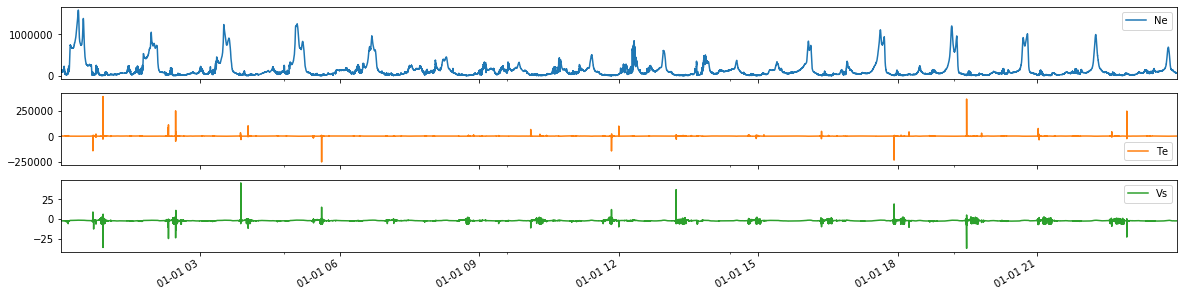

In [8]:
df.plot(y=["Ne", "Te", "Vs"], subplots=True, figsize=(20,5));

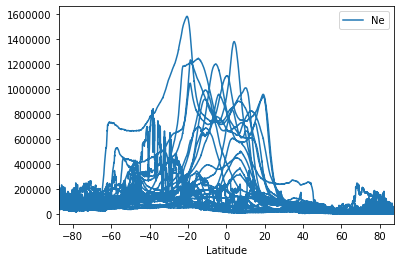

In [9]:
df.plot(x="Latitude", y="Ne");

### Load as xarray

In [10]:
ds = data.as_xarray()
ds

<xarray.Dataset>
Dimensions:     (Timestamp: 172776)
Coordinates:
  * Timestamp   (Timestamp) datetime64[ns] 2016-01-01T00:00:00.197000027 ... 2016-01-01T23:59:59.696000099
Data variables:
    Spacecraft  (Timestamp) object 'A' 'A' 'A' 'A' 'A' ... 'A' 'A' 'A' 'A' 'A'
    Longitude   (Timestamp) float64 92.8 92.81 92.83 ... -95.37 -95.37 -95.37
    Ne          (Timestamp) float64 1.262e+05 1.278e+05 ... 6.485e+04 6.43e+04
    Flags_Ne    (Timestamp) uint8 20 20 20 20 20 20 20 ... 20 20 20 20 20 20 20
    Te_error    (Timestamp) float64 1e+10 1e+10 1e+10 ... 1e+10 1e+10 1e+10
    Flags_LP    (Timestamp) uint8 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1
    Ne_error    (Timestamp) float64 1e+10 1e+10 1e+10 ... 1e+10 1e+10 1e+10
    Latitude    (Timestamp) float64 -72.51 -72.54 -72.57 ... 31.65 31.69 31.72
    Flags_Vs    (Timestamp) uint8 20 20 20 20 20 20 20 ... 20 20 20 20 20 20 20
    Vs          (Timestamp) float64 -2.201 -2.193 -2.2 ... -2.244 -2.239 -2.243
    Vs_error    (Timestamp) float64 1e+10 1e+10 1e+10 ... 1e+10 1e+10 1e+10
    Radius      (Timestamp) float64 6.834e+06 6.834e+06 ... 6.823e+06 6.823e+06
    U_orbit     (Timestamp) float64 7.604e+03 7.604e+03 ... 7.634e+03 7.634e+03
    Te          (Timestamp) float64 2.945e+03 2.892e+03 ... 2.527e+03 2.545e+03
    Flags_Te    (Timestamp) uint8 20 20 20 20 20 20 20 ... 20 20 20 20 20 20 20
Attributes:
    Sources:         ['SW_OPER_EFIA_LP_1B_20160101T000000_20160101T235959_050...
    MagneticModels:  []
    RangeFilters:    []

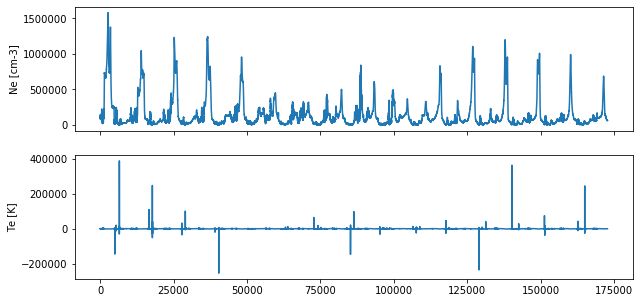

In [11]:
fig, (ax1, ax2) = plt.subplots(figsize=(10, 5), nrows=2, sharex=True)
def subplot(_ax, da):
    """Plot a given DataArray on a given axes"""
    _ax.plot(da)
    _ax.set_ylabel(f"{da.name} [{da.units}]")
for var, ax in zip(("Ne", "Te"), (ax1, ax2)):
    subplot(ax, ds[var])